In [1]:
import os 
import glob
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# READ WAVE SENSOR FILES AND MERGE
wdir     = os.path.join('c:/','Users','sa01ld','OneDrive - SAMS','Projects','Autonaut-EE', 'Non-Acoustic data','Motus_Wave_Sensor_5729_01')
indir    = os.path.join(wdir,'2021/*')

In [54]:
swh=[] # significant wave height
wpd=[] # wave peak direction
wpp=[] # wave peak period
time=[] # time array

fdr =glob.glob(indir)
for j in fdr:
    fdir = os.path.join(j + '/*.DAT')
    fname =glob.glob(fdir)

    for i in fname:
        bn = os.path.splitext(os.path.basename(i))[0] # unique file ID
        sepstr = bn.split("_")
        dtime=sepstr[8]
        tstr=(sepstr[5]+'-'+sepstr[6]+'-'+sepstr[7]+'T'+dtime[0:2]+':'+dtime[2:4]+':'+dtime[4:6])
        time.append(tstr)
        df = pd.read_csv(i, sep='\t', lineterminator='\n',header=None)
        ndf = df[[3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53]]
        swh.append(ndf[4])
        wpd.append(ndf[8])
        wpp.append(ndf[16])
    
swh=np.concatenate(swh)
wpd=np.concatenate(wpd)
wpp=np.concatenate(wpp)
time=np.array(time, dtype='datetime64')

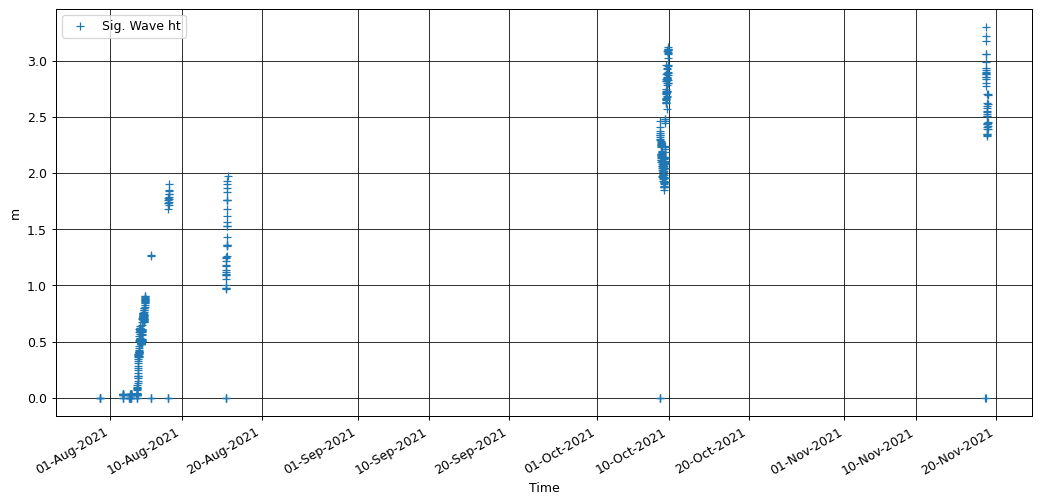

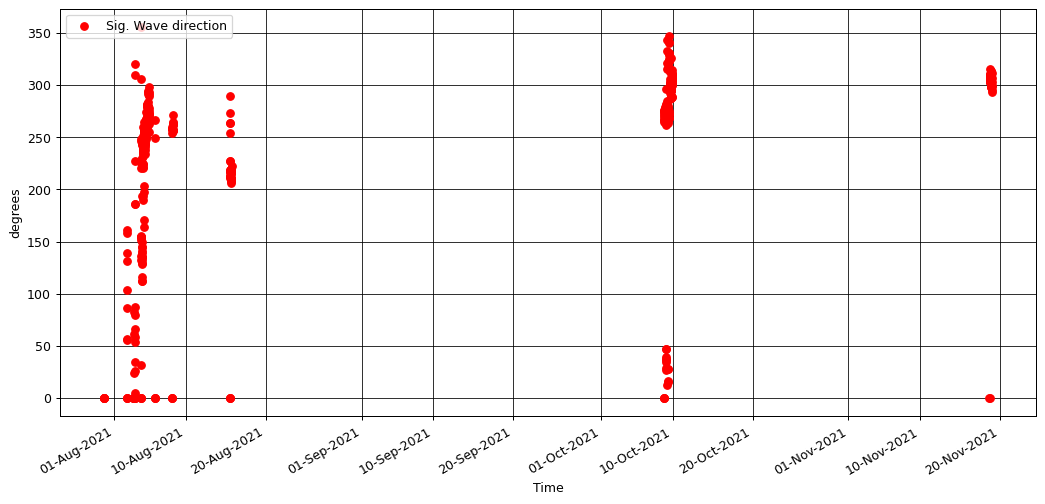

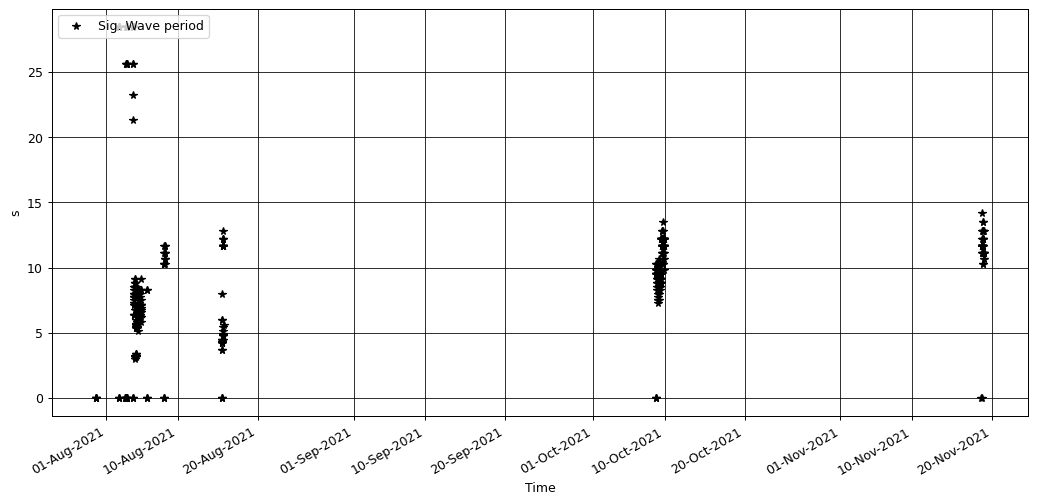

In [66]:
%matplotlib inline
fig, ax = plt.subplots(figsize=[14, 6], sharex=True, dpi=90)
plt.plot(time,swh,'+', label="Sig. Wave ht")
plt.xlabel("Time")
plt.ylabel("m")
plt.legend(loc='upper left')
plt.grid(visible='True', which='major', axis='both', c='black',alpha=0.8)
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=(1,10,20)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
figfile=os.path.join('figures/' +'sig_wave_ht.png')
fig.savefig(figfile, dpi=100, facecolor='white')
plt.show()


fig, ax = plt.subplots(figsize=[14, 6], sharex=True, dpi=90)
plt.plot(time,wpd,'or', label="Sig. Wave direction")
plt.xlabel("Time")
plt.ylabel("degrees")
plt.legend(loc='upper left')
plt.grid(visible='True', which='major', axis='both', c='black',alpha=0.8)
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=(1,10,20)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
figfile=os.path.join('figures/' +'sig_wave_dir.png')
fig.savefig(figfile, dpi=100, facecolor='white')
plt.show()

fig, ax = plt.subplots(figsize=[14, 6], sharex=True, dpi=90)
plt.plot(time,wpp,'*k', label="Sig. Wave period")
plt.xlabel("Time")
plt.ylabel("s")
plt.legend(loc='upper left')
plt.grid(visible='True', which='major', axis='both', c='black',alpha=0.8)
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=(1,10,20)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
figfile=os.path.join('figures/' +'sig_wave_period.png')
fig.savefig(figfile, dpi=100, facecolor='white')
plt.show()